<a href="https://colab.research.google.com/github/shannondill/GEOG5990M/blob/main/V2_finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GEOG5990M Final Assignment (Template)

Student ID number:

# Import packages

In [ ]:
#Pip installs
! pip install contextily
! pip install geoplot
! pip install git+https://github.com/pmdscully/geo_northarrow.git
! pip install patoolib
! pip install mapclassify

In [6]:
# import required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from scipy import stats
import numpy as np

import geoplot as gplt
import geoplot.crs as gcrs
from geo_northarrow import add_north_arrow
import contextily as ctx
import patoolib
import glob

# import machine learning packages
from sklearn import cluster
from sklearn.preprocessing import scale

# set seaborn plotting theme to white
sns.set_theme(style="white")


In [5]:
#Extracting the data into a folder
patoolib.extract_archive('/content/OSM_cycleroutes.zip', outdir='/content/OSM_cycleroutes')

INFO patool: Extracting /content/OSM_cycleroutes.zip ...
INFO:patool:Extracting /content/OSM_cycleroutes.zip ...
INFO patool: ... creating output directory `/content/OSM_cycleroutes'.
INFO:patool:... creating output directory `/content/OSM_cycleroutes'.
INFO patool: running /usr/bin/7z x -aou -o/content/OSM_cycleroutes -- /content/OSM_cycleroutes.zip
INFO:patool:running /usr/bin/7z x -aou -o/content/OSM_cycleroutes -- /content/OSM_cycleroutes.zip
INFO patool: ... /content/OSM_cycleroutes.zip extracted to `/content/OSM_cycleroutes'.
INFO:patool:... /content/OSM_cycleroutes.zip extracted to `/content/OSM_cycleroutes'.


'/content/OSM_cycleroutes'

# Import data sets

In [ ]:
# LSOA data [1]
lsoa_data = gpd.read_file('Lower_layer_Super_Output_Areas_(December_2021)_Boundaries_EW_BFC_(V10).csv')
# make column names lowercase
lsoa_data.columns = lsoa_data.columns.str.lower()
# check table has been updated
lsoa_data.head()

,fid,lsoa21cd,lsoa21nm,lsoa21nmw,bng_e,bng_n,lat,long,shape__area,shape__length,globalid
0,1,E01000001,City of London 001A,,532123,181632,51.51817,-0.09715,129865.3145,2635.767993,c625aea8-6d73-4b2a-be76-4d5c44cad9f8
1,2,E01000002,City of London 001B,,532480,181715,51.51883,-0.09197,228419.7822,2707.816821,52c878e9-ac68-4886-b4a8-fea9cd241a70
2,3,E01000003,City of London 001C,,532239,182033,51.52174,-0.09533,59054.2047,1224.57316,b9d8faca-d489-478d-8ce6-acaf76186d7d
3,4,E01000005,City of London 001E,,533581,181283,51.51469,-0.07628,189577.7095,2275.805344,15e1417d-537c-4845-9820-fc7596bd59b0
4,5,E01000006,Barking and Dagenham 016A,,544994,184274,51.53875,0.089317,146536.9958,1966.092607,8a6c4ee0-c0ff-4736-9cfa-fb12a6d50da0


In [12]:
#Import the shapefiles
for filepath in glob.iglob('D:\GEOG5990_programming\Assignment2\CycleData'):
    gdf = gpd.read_file('OSM_cycleroutes')

# SHAPEFILE SOURCE:
# https://www.openstreetmap.org/export#map=12/53.7949/-1.5504&layers=C

# SOURCE
# https://gis.stackexchange.com/questions/394391/reading-all-shapefiles-in-folder-using-geopandas-and-then-clipping-them-all-iter

In [ ]:
# Method used to travel to work [2]
travel = gpd.read_file('LSOA_RM077-2021-4-filtered-2025-04-28T10_55_14Z.csv')
# make column names lower case
travel.columns = travel.columns.str.lower()
# check table has been updated
travel.head()

,lower layer super output areas code,lower layer super output areas,method used to travel to workplace (12 categories) code,method used to travel to workplace (12 categories),distance travelled to work (5 categories) code,distance travelled to work (5 categories),observation
0,E01000001,City of London 001A,1,Work mainly at or from home,1,Less than 10km,0
1,E01000001,City of London 001A,1,Work mainly at or from home,2,10km to less than 30km,0
2,E01000001,City of London 001A,1,Work mainly at or from home,3,30km and over,0
3,E01000001,City of London 001A,1,Work mainly at or from home,4,Works mainly from home,639
4,E01000001,City of London 001A,1,Work mainly at or from home,5,"Not in employment or works mainly offshore, in...",0


In [14]:
# Cycle Data (July 2024) [3]
cycle_july = gpd.read_file('CycleData_July2024.csv')
# make columns lower case
cycle_july.columns = cycle_july.columns.str.lower()
#check table has been updated
cycle_july.head()

,sdate,cosit,period,lanenumber,lanedescription,lanedirection,directiondescription,volume,flag text
0,01/07/2024,80474,60,1,Eastbound,1,East,1,Checked
1,01/07/2024,80474,60,2,Westbound,2,West,0,Checked
2,01/07/2024,80474,60,1,Eastbound,1,East,0,Checked
3,01/07/2024,80474,60,2,Westbound,2,West,1,Checked
4,01/07/2024,80474,60,1,Eastbound,1,East,0,Checked


In [13]:
# Leeds Cycle Sites [2]
cyclesites = gpd.read_file('ListCycleCountSites_Leeds_Sept2024.csv')
# make column names lowercase
cyclesites.columns = cyclesites.columns.str.lower()
# check table has been updated
cyclesites.head()

,site_id,site_name,description,grid,latitude,longitude
0,80474,Cycle H0474,A647 Bradford Road Cycle Superhighway (eastbound),4.20E+11,53.8029,-1.69942
1,80475,Cycle H0475,A647 Bradford Road Cycle Superhighway (westbound),4.20E+11,53.80304,-1.6975
2,90120,Cycle I0120,Kirkstall Forge Canal Towpath Cycle Counter,4.25E+11,53.82305,-1.62262
3,90241,Cycle I0241,Cardigan Lane Cycle Counter,4.28E+11,53.81308,-1.57279
4,90319,Cycle I0319,Stanningley Road Cycle Superhighway (eastbound),4.25E+11,53.80571,-1.62874


In [ ]:
# National Cycle Network [4]
cycle_network = gpd.read_file('National_Cycle_Network_Public_1462280800782486279.csv')
# make columns lower case
cycle_network.columns = cycle_network.columns.str.lower()
# check table has been updated
cycle_network.head()

,fid,description,greenway,routetype,routeno,linkno,routecat,openstatus,surface,quality,lighting,roadclass,shape__length,globalid,segment id
0,1,OnRoad,No,NCN,15,0,Main Route,Open,Asphalt,Standard,FullLit,Minor Road,477.544786108191,caebf34a-23d2-4f9b-8565-fa57e08374fb,32999
1,2,TrafficFree,Yes,NCN,62,0,Main Route,Open,PavementSlabs,Acceptable,PartLit,,124.328975576789,ea01210f-8d0b-4981-9725-4ea8aeaecd13,6670
2,3,TrafficFree,No,NCN,24,0,Alternative Route,Open,Asphalt,Standard,FullLit,,150.432918400757,1365372a-0a00-4059-82be-003890e87632,34961
3,4,OnRoad,No,NCN,1,0,Main Route,Open,Asphalt,Standard,NotLit,Minor Road,8193.8707574063,ff3a6f62-a4f4-4a99-b64d-03e738d37e28,12776
4,5,OnRoad,No,NCN,70,0,Main Route,Open,Asphalt,Standard,NotLit,Minor Road,5435.26467037993,3e668643-ff3b-4779-bf7a-68109d094524,21972


LSOA data [1](https://geoportal.statistics.gov.uk/datasets/ons::lower-layer-super-output-areas-december-2021-boundaries-ew-bfc-v10-2/about)

Method used to travel to work [2](https://www.ons.gov.uk/datasets/RM077/editions/2021/versions/4?showAll=transport_to_workplace_12a#transport_to_workplace_12a)

Cycle data (July 2024) [3](https://datamillnorth.org/dataset/e1dmk/leeds-annual-cycle-growth)


National Cycle Network [4](https://data-sustrans-uk.opendata.arcgis.com/datasets/5defd254e78745bfb12d0456abc1bcf1_0/explore?location=53.777209%2C-1.772170%2C9.58)

This is an example block of mardown text I want to reference <a href="#ref1">[1]</a>. I might need to add some more citations <a href="#ref2">[2]</a><a href="#ref2">[3]</a>



# Data cleaning

### Updating data types

In [15]:
# table join LEFT
# cyclejuly24 --> cyclesites
# cosit --> siteid
cycle_leeds = pd.merge(cycle_july, cyclesites, left_on='cosit', right_on='site_id',
                        how='left')
# check table has been updated
cycle_leeds.head()

,sdate,cosit,period,lanenumber,lanedescription,lanedirection,directiondescription,volume,flag text,site_id,site_name,description,grid,latitude,longitude
0,01/07/2024,80474,60,1,Eastbound,1,East,1,Checked,80474,Cycle H0474,A647 Bradford Road Cycle Superhighway (eastbound),4.20E+11,53.8029,-1.69942
1,01/07/2024,80474,60,2,Westbound,2,West,0,Checked,80474,Cycle H0474,A647 Bradford Road Cycle Superhighway (eastbound),4.20E+11,53.8029,-1.69942
2,01/07/2024,80474,60,1,Eastbound,1,East,0,Checked,80474,Cycle H0474,A647 Bradford Road Cycle Superhighway (eastbound),4.20E+11,53.8029,-1.69942
3,01/07/2024,80474,60,2,Westbound,2,West,1,Checked,80474,Cycle H0474,A647 Bradford Road Cycle Superhighway (eastbound),4.20E+11,53.8029,-1.69942
4,01/07/2024,80474,60,1,Eastbound,1,East,0,Checked,80474,Cycle H0474,A647 Bradford Road Cycle Superhighway (eastbound),4.20E+11,53.8029,-1.69942


In [17]:
# Check what the data types are classed under
cycle_leeds.dtypes

,0
sdate,object
cosit,object
period,object
lanenumber,object
lanedescription,object
lanedirection,object
directiondescription,object
volume,object
flag text,object
site_id,object


In [18]:
# update the data types from 'objects' to its numeric form (eg/. 'float', 'int', 'string')
cycle_leeds['cosit']=pd.to_numeric(cycle_leeds['cosit'])

cycle_leeds['lanedescription']=cycle_leeds['lanedescription'].astype('str')
cycle_leeds['directiondescription']=cycle_leeds['directiondescription'].astype('str')

cycle_leeds['volume']=pd.to_numeric(cycle_leeds['volume'])

cycle_leeds['site_id']=pd.to_numeric(cycle_leeds['site_id'])
cycle_leeds['site_name']=cycle_leeds['site_name'].astype('str')

cycle_leeds['latitude']=pd.to_numeric(cycle_leeds['latitude'])
cycle_leeds['longitude']=pd.to_numeric(cycle_leeds['longitude'])


# check it has been updated
cycle_leeds.dtypes

#SOURCE: https://stackoverflow.com/questions/39173813/pandas-convert-dtype-object-to-int
  # df['col_name'] = pd.to_numeric(df['col_name'])
#SOURCE: https://stackoverflow.com/questions/33957720/how-to-convert-column-with-dtype-as-object-to-string-in-pandas-dataframe
  # df['column'] = df['column'].astype('str')

,0
sdate,object
cosit,int64
period,object
lanenumber,object
lanedescription,object
lanedirection,object
directiondescription,object
volume,int64
flag text,object
site_id,int64


In [19]:
### CO-PILOT ###
# The following prompt was used in Co-pilot to isolate and join the geometry column with the LSOA data:
# "python, pandas: generate a code using pd.to_datetime(df['col']) to ensure the
  # date is read day-month-year"
# The response generated was used to help write the below code

# change sdate from 'object' to 'date' dtype
cycle_leeds['sdate']=pd.to_datetime(cycle_leeds['sdate'],
                                     # make sure it is reading as day/month/year
                                     dayfirst=True)

# Check changes were made
cycle_leeds.dtypes

,0
sdate,datetime64[ns]
cosit,int64
period,object
lanenumber,object
lanedescription,object
lanedirection,object
directiondescription,object
volume,int64
flag text,object
site_id,int64


### Subsetting spatial data

In [ ]:
### CO-PILOT ###
# The following prompt was used in Co-pilot to .loc[] LSOA Leeds specific data:
# "generate a code using the python .loc[] function to loc only Leeds LSOAs"
# The response generated was used to help write the below code

# .loc[] Leeds from lsoa_data
leeds_lsoa = lsoa_data.loc[lsoa_data['lsoa21nm'].str.contains('Leeds')]
# check the data set has been updated
leeds_lsoa

,fid,lsoa21cd,lsoa21nm,lsoa21nmw,bng_e,bng_n,lat,long,shape__area,shape__length,globalid
10719,10720,E01011264,Leeds 011A,,420937,441836,53.87233,-1.68306,637324.7156,5076.727907,e4ed2f01-7253-4c5a-ba48-c2778526dc67
10720,10721,E01011265,Leeds 009A,,418988,441951,53.87343,-1.7127,527367.1557,7553.237963,4d252abf-180d-4c24-ae8f-3932dd433d0f
10721,10722,E01011266,Leeds 008A,,417489,442615,53.87945,-1.73546,2531466.823,8353.989324,66191f73-111e-4f37-ba33-42666730927f
10722,10723,E01011267,Leeds 009B,,419641,442025,53.87408,-1.70276,449191.1884,3774.393194,85e5e657-9d57-4a48-aa5f-61fdc02cd326
10723,10724,E01011268,Leeds 010A,,420224,441935,53.87324,-1.6939,394948.3448,4362.834372,58280f14-db59-4eee-875a-44d3c04026d8
...,...,...,...,...,...,...,...,...,...,...,...
33044,33045,E01035050,Leeds 105G,,430214,426790,53.73664,-1.54345,532806.7558,5833.845758,91edb037-8a33-49b5-b823-62406c0b7d31
33045,33046,E01035051,Leeds 105H,,431335,427174,53.74003,-1.52641,1124705.424,6577.324636,9c833608-ae33-45b3-9702-a46aac7be0d7
33046,33047,E01035052,Leeds 105I,,431014,426532,53.73428,-1.53135,748292.243,5389.530292,98680248-1be6-47ee-baab-f9bba0f24f78
33047,33048,E01035053,Leeds 105J,,432010,426253,53.73171,-1.51628,1545860.508,8395.583808,9c84b71d-8064-4ed2-9cd2-08859f1431bf


In [ ]:
# produce geometry column for leeds_lsoa
leeds_lsoa = gpd.GeoDataFrame(
    leeds_lsoa,
    geometry = gpd.points_from_xy(
        x = leeds_lsoa.long,
        y = leeds_lsoa.lat,
        crs = 'EPSG:27700'))

leeds_lsoa.head()

#SOURCE: https://gis.stackexchange.com/questions/448501/creating-geometry-from-lat-lon-column-using-python
  # gdf = gpd.GeoDataFrame(
    #df,
   # geometry = gpd.points_from_xy(
      #  x = df.Longitude,
      #  y = df.Latitude,
       # crs = 'EPSG:4326', # or: crs = pyproj.CRS.from_user_input(4326)
   # )

,fid,lsoa21cd,lsoa21nm,lsoa21nmw,bng_e,bng_n,lat,long,shape__area,shape__length,globalid,geometry
10719,10720,E01011264,Leeds 011A,,420937,441836,53.87233,-1.68306,637324.7156,5076.727907,e4ed2f01-7253-4c5a-ba48-c2778526dc67,POINT (-1.683 53.872)
10720,10721,E01011265,Leeds 009A,,418988,441951,53.87343,-1.7127,527367.1557,7553.237963,4d252abf-180d-4c24-ae8f-3932dd433d0f,POINT (-1.713 53.873)
10721,10722,E01011266,Leeds 008A,,417489,442615,53.87945,-1.73546,2531466.823,8353.989324,66191f73-111e-4f37-ba33-42666730927f,POINT (-1.735 53.879)
10722,10723,E01011267,Leeds 009B,,419641,442025,53.87408,-1.70276,449191.1884,3774.393194,85e5e657-9d57-4a48-aa5f-61fdc02cd326,POINT (-1.703 53.874)
10723,10724,E01011268,Leeds 010A,,420224,441935,53.87324,-1.6939,394948.3448,4362.834372,58280f14-db59-4eee-875a-44d3c04026d8,POINT (-1.694 53.873)


In [ ]:
# # .loc[] Leeds from travel data
leeds_travel = travel.loc[travel['lower layer super output areas'].str.contains('Leeds')]
# check the data set has been updated
leeds_travel

,lower layer super output areas code,lower layer super output areas,method used to travel to workplace (12 categories) code,method used to travel to workplace (12 categories),distance travelled to work (5 categories) code,distance travelled to work (5 categories),observation
643140,E01011264,Leeds 011A,1,Work mainly at or from home,1,Less than 10km,0
643141,E01011264,Leeds 011A,1,Work mainly at or from home,2,10km to less than 30km,0
643142,E01011264,Leeds 011A,1,Work mainly at or from home,3,30km and over,0
643143,E01011264,Leeds 011A,1,Work mainly at or from home,4,Works mainly from home,156
643144,E01011264,Leeds 011A,1,Work mainly at or from home,5,"Not in employment or works mainly offshore, in...",0
...,...,...,...,...,...,...,...
669415,E01011739,Leeds 080D,12,Not in employment or aged 15 years and under,1,Less than 10km,0
669416,E01011739,Leeds 080D,12,Not in employment or aged 15 years and under,2,10km to less than 30km,0
669417,E01011739,Leeds 080D,12,Not in employment or aged 15 years and under,3,30km and over,0
669418,E01011739,Leeds 080D,12,Not in employment or aged 15 years and under,4,Works mainly from home,0


In [ ]:
# Table Join leeds_lsoa and leeds_travel
leeds = pd.merge(leeds_lsoa, leeds_travel, left_on='lsoa21nm',
                 right_on='lower layer super output areas',
                 how='left')
leeds

,fid,lsoa21cd,lsoa21nm,lsoa21nmw,bng_e,bng_n,lat,long,shape__area,shape__length,globalid,geometry,lower layer super output areas code,lower layer super output areas,method used to travel to workplace (12 categories) code,method used to travel to workplace (12 categories),distance travelled to work (5 categories) code,distance travelled to work (5 categories),observation
0,10720,E01011264,Leeds 011A,,420937,441836,53.87233,-1.68306,637324.7156,5076.727907,e4ed2f01-7253-4c5a-ba48-c2778526dc67,POINT (-1.683 53.872),E01011264,Leeds 011A,1,Work mainly at or from home,1,Less than 10km,0
1,10720,E01011264,Leeds 011A,,420937,441836,53.87233,-1.68306,637324.7156,5076.727907,e4ed2f01-7253-4c5a-ba48-c2778526dc67,POINT (-1.683 53.872),E01011264,Leeds 011A,1,Work mainly at or from home,2,10km to less than 30km,0
2,10720,E01011264,Leeds 011A,,420937,441836,53.87233,-1.68306,637324.7156,5076.727907,e4ed2f01-7253-4c5a-ba48-c2778526dc67,POINT (-1.683 53.872),E01011264,Leeds 011A,1,Work mainly at or from home,3,30km and over,0
3,10720,E01011264,Leeds 011A,,420937,441836,53.87233,-1.68306,637324.7156,5076.727907,e4ed2f01-7253-4c5a-ba48-c2778526dc67,POINT (-1.683 53.872),E01011264,Leeds 011A,1,Work mainly at or from home,4,Works mainly from home,156
4,10720,E01011264,Leeds 011A,,420937,441836,53.87233,-1.68306,637324.7156,5076.727907,e4ed2f01-7253-4c5a-ba48-c2778526dc67,POINT (-1.683 53.872),E01011264,Leeds 011A,1,Work mainly at or from home,5,"Not in employment or works mainly offshore, in...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26325,33045,E01035050,Leeds 105G,,430214,426790,53.73664,-1.54345,532806.7558,5833.845758,91edb037-8a33-49b5-b823-62406c0b7d31,POINT (-1.543 53.737),NaN,NaN,NaN,NaN,NaN,NaN,NaN
26326,33046,E01035051,Leeds 105H,,431335,427174,53.74003,-1.52641,1124705.424,6577.324636,9c833608-ae33-45b3-9702-a46aac7be0d7,POINT (-1.526 53.74),NaN,NaN,NaN,NaN,NaN,NaN,NaN
26327,33047,E01035052,Leeds 105I,,431014,426532,53.73428,-1.53135,748292.243,5389.530292,98680248-1be6-47ee-baab-f9bba0f24f78,POINT (-1.531 53.734),NaN,NaN,NaN,NaN,NaN,NaN,NaN
26328,33048,E01035053,Leeds 105J,,432010,426253,53.73171,-1.51628,1545860.508,8395.583808,9c84b71d-8064-4ed2-9cd2-08859f1431bf,POINT (-1.516 53.732),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# check the crs is British National Grid
leeds.crs

<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [ ]:
# Ensure it is saved as a GeoDataFrame (to make use of the geometry)
leeds = gpd.GeoDataFrame(leeds)

# Statistical Modelling

### Non-spatial Visualization

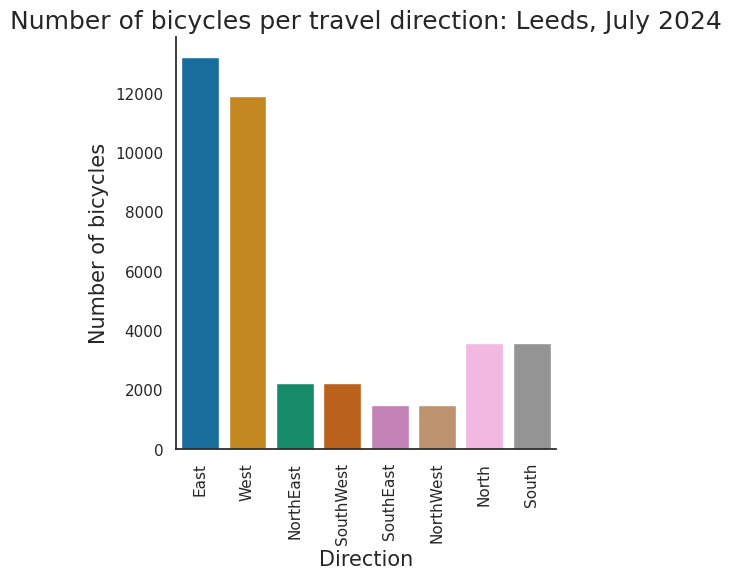

In [20]:
sns.catplot(x='directiondescription', data=cycle_leeds, kind='count', width=0.8,
            #set colour
            palette='colorblind', hue='directiondescription', legend=False)

#set title and font size
plt.title('Number of bicycles per travel direction: Leeds, July 2024', size=18)

#set axis titles and font size
plt.xlabel('Direction', size=15)
plt.ylabel('Number of bicycles', size=15)


#rotate x-axis labels
plt.xticks(rotation=90)
plt.show()

In [ ]:
leeds.dropna()

,fid,lsoa21cd,lsoa21nm,lsoa21nmw,bng_e,bng_n,lat,long,shape__area,shape__length,globalid,geometry,lower layer super output areas code,lower layer super output areas,method used to travel to workplace (12 categories) code,method used to travel to workplace (12 categories),distance travelled to work (5 categories) code,distance travelled to work (5 categories),observation
0,10720,E01011264,Leeds 011A,,420937,441836,53.87233,-1.68306,637324.7156,5076.727907,e4ed2f01-7253-4c5a-ba48-c2778526dc67,POINT (-1.683 53.872),E01011264,Leeds 011A,1,Work mainly at or from home,1,Less than 10km,0
1,10720,E01011264,Leeds 011A,,420937,441836,53.87233,-1.68306,637324.7156,5076.727907,e4ed2f01-7253-4c5a-ba48-c2778526dc67,POINT (-1.683 53.872),E01011264,Leeds 011A,1,Work mainly at or from home,2,10km to less than 30km,0
2,10720,E01011264,Leeds 011A,,420937,441836,53.87233,-1.68306,637324.7156,5076.727907,e4ed2f01-7253-4c5a-ba48-c2778526dc67,POINT (-1.683 53.872),E01011264,Leeds 011A,1,Work mainly at or from home,3,30km and over,0
3,10720,E01011264,Leeds 011A,,420937,441836,53.87233,-1.68306,637324.7156,5076.727907,e4ed2f01-7253-4c5a-ba48-c2778526dc67,POINT (-1.683 53.872),E01011264,Leeds 011A,1,Work mainly at or from home,4,Works mainly from home,156
4,10720,E01011264,Leeds 011A,,420937,441836,53.87233,-1.68306,637324.7156,5076.727907,e4ed2f01-7253-4c5a-ba48-c2778526dc67,POINT (-1.683 53.872),E01011264,Leeds 011A,1,Work mainly at or from home,5,"Not in employment or works mainly offshore, in...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26275,11157,E01011739,Leeds 080D,,425086,433629,53.79838,-1.62063,352310.9525,4576.513402,a72f1d8b-b396-4e2a-a7f3-10fca1e3c079,POINT (-1.621 53.798),E01011739,Leeds 080D,12,Not in employment or aged 15 years and under,1,Less than 10km,0
26276,11157,E01011739,Leeds 080D,,425086,433629,53.79838,-1.62063,352310.9525,4576.513402,a72f1d8b-b396-4e2a-a7f3-10fca1e3c079,POINT (-1.621 53.798),E01011739,Leeds 080D,12,Not in employment or aged 15 years and under,2,10km to less than 30km,0
26277,11157,E01011739,Leeds 080D,,425086,433629,53.79838,-1.62063,352310.9525,4576.513402,a72f1d8b-b396-4e2a-a7f3-10fca1e3c079,POINT (-1.621 53.798),E01011739,Leeds 080D,12,Not in employment or aged 15 years and under,3,30km and over,0
26278,11157,E01011739,Leeds 080D,,425086,433629,53.79838,-1.62063,352310.9525,4576.513402,a72f1d8b-b396-4e2a-a7f3-10fca1e3c079,POINT (-1.621 53.798),E01011739,Leeds 080D,12,Not in employment or aged 15 years and under,4,Works mainly from home,0


Data Visualisation
- Don't forget to present your final two data visualisation (one spatial and one non-spatial) and the justifications about the decisions you made whilst preparing and visualising the data.

In [ ]:
sns.jointplot(x='method used to travel to workplace (12 categories)',y='fare', kind ='scatter',data=titanic);

In [ ]:
# # .loc[] Leeds from travel data
leeds_travel = travel.loc[travel['lower layer super output areas'].str.contains('Leeds')]
# check the data set has been updated
leeds_travel

In [ ]:
leeds_bike = leeds.loc[leeds['method used to travel to workplace (12 categories)'].str.contains('Bicycle')]

leeds_bike

ValueError: Cannot mask with non-boolean array containing NA / NaN values

## References
<p><a href="add_url_here">[1]</a>Footnote citation goes here</p>
<p><a href="https://github.com/FrancescaPontin/GEOG5990">[2]</a>GEOG5990M course materials</p>
<p><a href="add_url_here">[3]</a>Citation 3</p>